In [1]:
import pandas as pd

books = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\books.csv")
print(books.head())

   id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   
3   4     2657          2657  3275794          487   61120081  9.780061e+12   
4   5     4671          4671   245494         1356  743273567  9.780743e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   
2              Stephenie Meyer                     2005.0   
3                   Harper Lee                     1960.0   
4          F. Scott Fitzgerald                     1925.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harry Potter and the Ph

In [4]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [3]:
print("Shape:", books.shape)
print("Columns:", books.columns)
books.head()

Shape: (10000, 23)
Columns: Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [3]:
# Check missing values
missing = books.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing)


Missing Values:
 language_code                1084
isbn                          700
isbn13                        585
original_title                585
original_publication_year      21
best_book_id                    0
id                              0
work_id                         0
books_count                     0
book_id                         0
authors                         0
title                           0
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called 'books'

# 1. Imputation for language_code with mode
language_mode = books['language_code'].mode()[0]  # 'eng' from your data
books['language_code'] = books['language_code'].fillna(language_mode)
print(f"Imputed language_code with mode: '{language_mode}'")

# 2. Imputation for isbn with 'Not Available'
books['isbn'] = books['isbn'].fillna('Not Available')
print("Imputed isbn with 'Not Available'")

# 3. Imputation for isbn13 with -1.0 (as a float placeholder)
books['isbn13'] = books['isbn13'].fillna(-1.0)
print("Imputed isbn13 with -1.0")

# 4. Imputation for original_title with corresponding title values
books['original_title'] = books['original_title'].fillna(books['title'])
print("Imputed original_title with values from title column")

# 5. Imputation for original_publication_year with median
median_year = books['original_publication_year'].median()  # 2004.0 from your data
books['original_publication_year'] = books['original_publication_year'].fillna(median_year)
print(f"Imputed original_publication_year with median: {median_year}")

# Verify all imputations
print("\nMissing values after imputation:")
print(books[['language_code', 'isbn', 'isbn13', 'original_title', 'original_publication_year']].isnull().sum())

# Optional: Check a few examples of imputed values
print("\nSample of imputed values:")
print("language_code sample:")
print(books['language_code'].value_counts().head())
print("\nisbn sample:")
print(books['isbn'].sample(5))
print("\nisbn13 sample:")
print(books['isbn13'].sample(5))
print("\noriginal_title sample:")
print(books[['title', 'original_title']].sample(5))
print("\noriginal_publication_year sample:")
print(books['original_publication_year'].value_counts().head(10))



Imputed language_code with mode: 'eng'
Imputed isbn with 'Not Available'
Imputed isbn13 with -1.0
Imputed original_title with values from title column
Imputed original_publication_year with median: 2004.0

Missing values after imputation:
language_code                0
isbn                         0
isbn13                       0
original_title               0
original_publication_year    0
dtype: int64

Sample of imputed values:
language_code sample:
language_code
eng      7425
en-US    2070
en-GB     257
ara        64
en-CA      58
Name: count, dtype: int64

isbn sample:
9768       144244228X
3619       1568650949
2012       1400076196
1474    Not Available
3089        739418378
Name: isbn, dtype: object

isbn13 sample:
2152    9.781939e+12
8468    9.780680e+12
4381    9.780316e+12
6228    9.780685e+12
8220    9.780811e+12
Name: isbn13, dtype: float64

original_title sample:
                                                  title  \
9338                        The Protector (O'Malley

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
books = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\books.csv")

# Function to display summary and plots
def analyze_data(books, stage="Before Cleaning"):
    print(f"\n--- {stage} ---")
    print("Data Info:")
    print(books.info())
    print("\nNumeric Summary:")
    print(books.describe())
    print("\nCategorical Summary:")
    print(books.describe(include='object'))

    # Plots
    plt.figure(figsize=(15, 10))
    
    # original_publication_year
    plt.subplot(2, 2, 1)
    sns.histplot(books['original_publication_year'].dropna(), bins=50, kde=True)
    plt.title(f'Original Publication Year ({stage})')
    
    # average_rating
    plt.subplot(2, 2, 2)
    sns.histplot(books['average_rating'].dropna(), bins=20, kde=True)
    plt.title(f'Average Rating ({stage})')
    
    # ratings_count
    plt.subplot(2, 2, 3)
    sns.histplot(books['ratings_count'].dropna(), bins=50, kde=True)
    plt.title(f'Ratings Count ({stage})')

NameError: name 'stage' is not defined

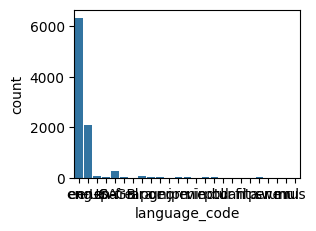

In [18]:
swapped_columns = ['language_code', 'isbn', 'isbn13', 'original_title']
    # language_code
plt.subplot(2, 2, 4)
sns.countplot(data=books, x='language_code')
plt.title(f'Language Code Counts ({stage})')
plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()



--- Before Cleaning ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_cou

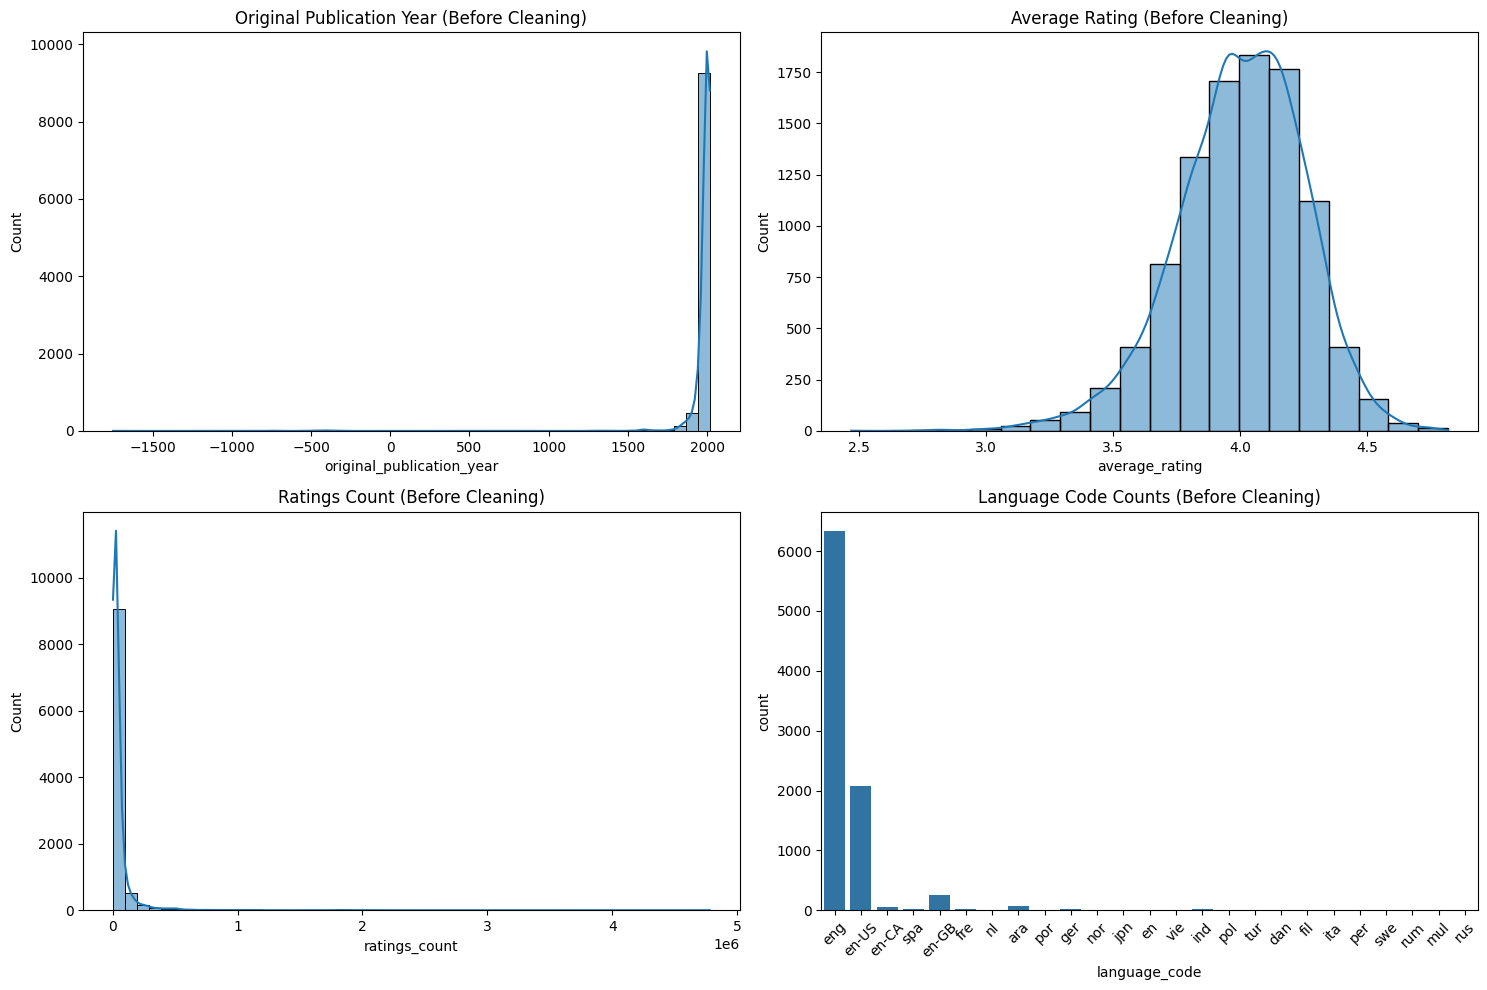

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
books = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\books.csv")

# Function to display summary and plots
def analyze_data(books, stage="Before Cleaning"):
    print(f"\n--- {stage} ---")
    print("Data Info:")
    print(books.info())
    print("\nNumeric Summary:")
    print(books.describe())
    print("\nCategorical Summary:")
    print(books.describe(include='object'))

    # Plots
    plt.figure(figsize=(15, 10))
    
    # original_publication_year
    plt.subplot(2, 2, 1)
    sns.histplot(books['original_publication_year'].dropna(), bins=50, kde=True)
    plt.title(f'Original Publication Year ({stage})')
    
    # average_rating
    plt.subplot(2, 2, 2)
    sns.histplot(books['average_rating'].dropna(), bins=20, kde=True)
    plt.title(f'Average Rating ({stage})')
    
    # ratings_count
    plt.subplot(2, 2, 3)
    sns.histplot(books['ratings_count'].dropna(), bins=50, kde=True)
    plt.title(f'Ratings Count ({stage})')
    
    swapped_columns = ['language_code', 'isbn', 'isbn13', 'original_title']
    # language_code
    plt.subplot(2, 2, 4)
    sns.countplot(data=books, x='language_code')
    plt.title(f'Language Code Counts ({stage})')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Before Cleaning Analysis
analyze_data(books, "Before Cleaning")

Invalid ISBNs (not 10 chars): 6601
Invalid ISBN13s (not 13 digits): 8
Ratings count mismatches: 9986

--- After Cleaning ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       10000 non-null  object 
 6   isbn13                     10000 non-null  object 
 7   authors                    10000 non-null  object 
 8   original_publication_year  10000 non-null  int64  
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code          

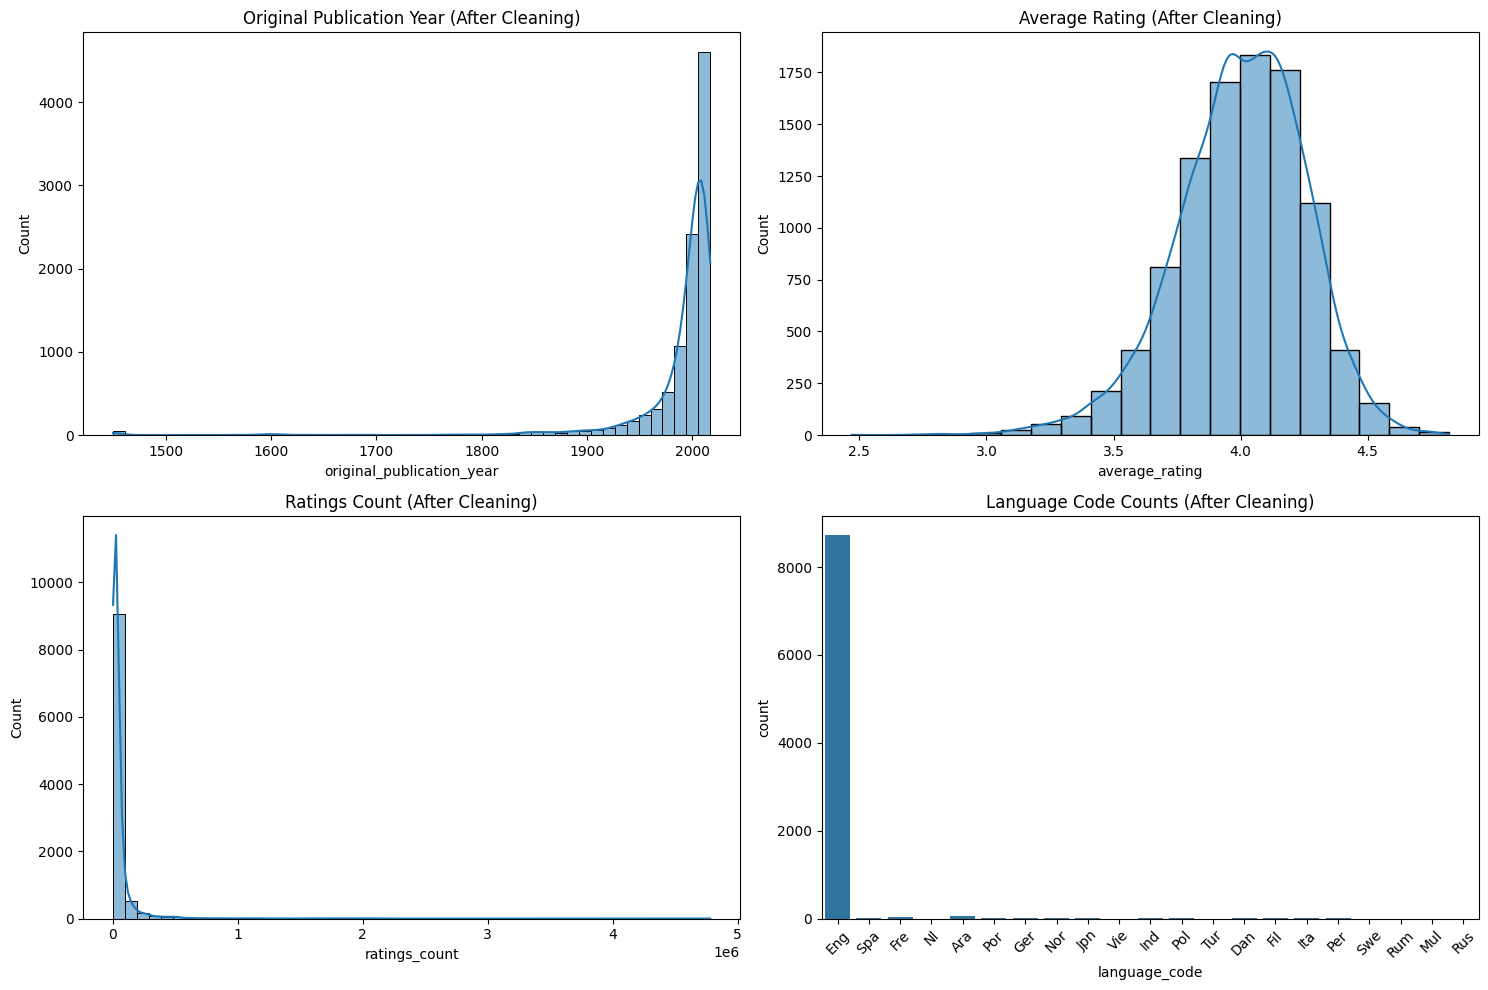


Cleaning Validation:
Duplicate book_id: 0
Negative ratings_count: 0
Implausible years: 0
Data Types:
id                             int64
book_id                        int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                        object
authors                       object
original_publication_year      int64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url               object
ratings_sum                    int64
dtype: obj

In [20]:


# Cleaning Functions
def clean_text(col):
    return col.str.strip().str.title() if col.dtype == 'object' else col

def clean_numeric(col, min_val=None, max_val=None):
    col = pd.to_numeric(col, errors='coerce')
    if min_val is not None:
        col = col.apply(lambda x: min_val if pd.notna(x) and x < min_val else x)
    if max_val is not None:
        col = col.apply(lambda x: max_val if pd.notna(x) and x > max_val else x)
    return col

# Apply Cleaning
books_cleaned = books.copy()

# 1. IDs
id_cols = ['id', 'book_id', 'best_book_id', 'work_id']
for col in id_cols:
    books_cleaned[col] = clean_numeric(books_cleaned[col], min_val=0).astype(int)

# 2. books_count
books_cleaned['books_count'] = clean_numeric(books_cleaned['books_count'], min_val=0).astype(int)

# 3. isbn (ensure string, basic length check)
books_cleaned['isbn'] = books_cleaned['isbn'].fillna('Not Available').astype(str).str.strip()
invalid_isbn = books_cleaned['isbn'].apply(lambda x: len(x) != 10 and x != 'Not Available')
print(f"Invalid ISBNs (not 10 chars): {invalid_isbn.sum()}")

# 4. isbn13 (convert to string, fix format)
books_cleaned['isbn13'] = books_cleaned['isbn13'].apply(lambda x: str(int(x)) if pd.notna(x) and x != -1.0 else '-1')
invalid_isbn13 = books_cleaned['isbn13'].apply(lambda x: len(x) != 13 and x != '-1')
print(f"Invalid ISBN13s (not 13 digits): {invalid_isbn13.sum()}")

# 5. Text columns
text_cols = ['authors', 'original_title', 'title', 'language_code']
for col in text_cols:
    books_cleaned[col] = clean_text(books_cleaned[col])
# Standardize language_code
books_cleaned['language_code'] = books_cleaned['language_code'].replace(['En-Us', 'En-Gb', 'En-Ca', 'En'], 'Eng')

# 6. original_publication_year
books_cleaned['original_publication_year'] = clean_numeric(books_cleaned['original_publication_year'], min_val=1450, max_val=2025).fillna(2004).astype(int)

# 7. Ratings
books_cleaned['average_rating'] = clean_numeric(books_cleaned['average_rating'], min_val=0, max_val=5)
rating_count_cols = ['ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']
for col in rating_count_cols:
    books_cleaned[col] = clean_numeric(books_cleaned[col], min_val=0).astype(int)
# Check ratings sum
books_cleaned['ratings_sum'] = books_cleaned[['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']].sum(axis=1)
rating_mismatch = (books_cleaned['ratings_sum'] != books_cleaned['ratings_count']).sum()
print(f"Ratings count mismatches: {rating_mismatch}")

# 8. URLs
url_cols = ['image_url', 'small_image_url']
for col in url_cols:
    books_cleaned[col] = books_cleaned[col].str.strip()
    books_cleaned[col] = books_cleaned[col].apply(lambda x: x if pd.notna(x) and x.startswith('http') else 'Invalid URL')

# After Cleaning Analysis
analyze_data(books_cleaned, "After Cleaning")

# Additional Checks
print("\nCleaning Validation:")
print("Duplicate book_id:", books_cleaned['book_id'].duplicated().sum())
print("Negative ratings_count:", (books_cleaned['ratings_count'] < 0).sum())
print("Implausible years:", ((books_cleaned['original_publication_year'] < 1450) | (books_cleaned['original_publication_year'] > 2025)).sum())
print("Data Types:")
print(books_cleaned.dtypes)


--- Before Cleaning ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_cou

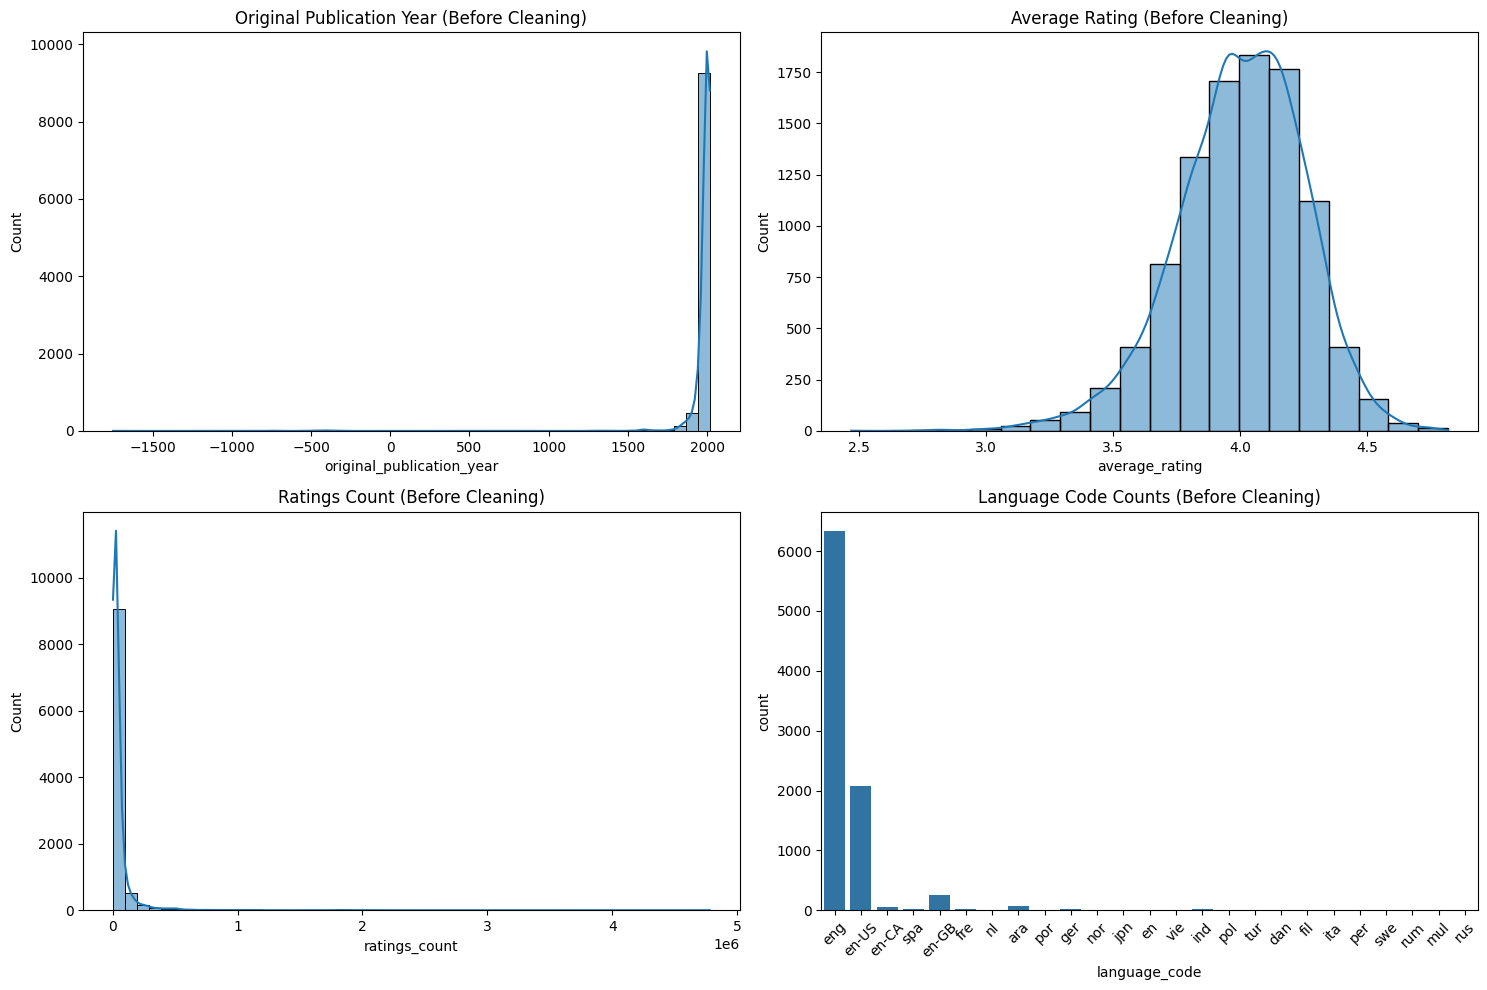

Invalid ISBNs (not 10 chars after cleaning): 7301
Invalid ISBN13s (not 13 digits): 8
Sample invalid ISBN13s: ['76783609419', '97893806587', '645573003012', '630809681058', '635517080452']
Empty original_title after cleaning: 5
Ratings count mismatches before adjustment: 9986
Ratings count mismatches after adjustment: 0

--- After Cleaning ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       10000 non-null  object 
 6   isbn13                     10000 non-null  object 
 7   authors                    

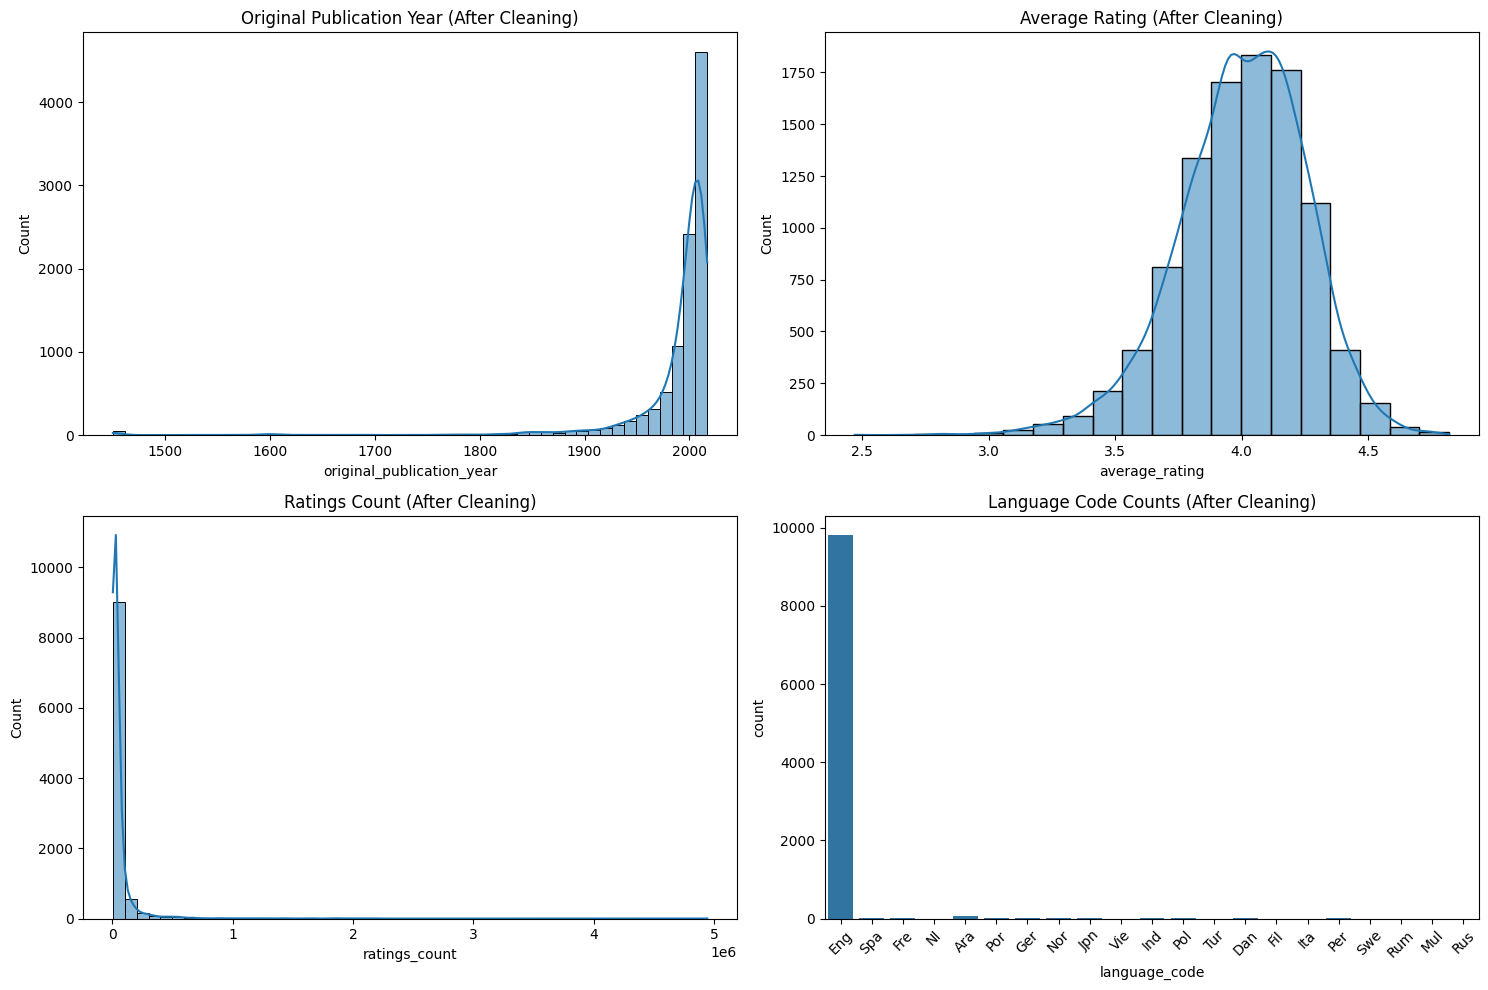


Cleaning Validation:
Missing values: 0
Duplicate book_id: 0
Negative ratings_count: 0
Implausible years: 0
Data Types:
id                             int64
book_id                        int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                        object
authors                       object
original_publication_year      int64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url               object
dtype: object


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
books = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\books.csv")

# Function to analyze data
def analyze_data(books, stage="Before Cleaning"):
    print(f"\n--- {stage} ---")
    print("Data Info:")
    print(books.info())
    print("\nNumeric Summary:")
    print(books.describe())
    print("\nCategorical Summary:")
    print(books.describe(include='object'))
    
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    sns.histplot(books['original_publication_year'].dropna(), bins=50, kde=True)
    plt.title(f'Original Publication Year ({stage})')
    plt.subplot(2, 2, 2)
    sns.histplot(books['average_rating'].dropna(), bins=20, kde=True)
    plt.title(f'Average Rating ({stage})')
    plt.subplot(2, 2, 3)
    sns.histplot(books['ratings_count'].dropna(), bins=50, kde=True)
    plt.title(f'Ratings Count ({stage})')
    plt.subplot(2, 2, 4)
    sns.countplot(data=books, x='language_code')
    plt.title(f'Language Code Counts ({stage})')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Before Cleaning (for reference)
analyze_data(books, "Before Cleaning")

# Cleaning Functions
def clean_text(col):
    return col.str.strip().str.title() if col.dtype == 'object' else col

def clean_numeric(col, min_val=None, max_val=None):
    col = pd.to_numeric(col, errors='coerce')
    if min_val is not None:
        col = col.apply(lambda x: min_val if pd.notna(x) and x < min_val else x)
    if max_val is not None:
        col = col.apply(lambda x: max_val if pd.notna(x) and x > max_val else x)
    return col

# Apply Cleaning
books_cleaned = books.copy()

# 1. Impute Missing Values (from prior steps)
books_cleaned['language_code'] = books_cleaned['language_code'].fillna('Eng')
books_cleaned['original_title'] = books_cleaned['original_title'].fillna(books_cleaned['title'])
books_cleaned['isbn'] = books_cleaned['isbn'].fillna('Not Available')
books_cleaned['isbn13'] = books_cleaned['isbn13'].fillna('-1')
books_cleaned['original_publication_year'] = books_cleaned['original_publication_year'].fillna(2004)

# 2. IDs
id_cols = ['id', 'book_id', 'best_book_id', 'work_id']
for col in id_cols:
    books_cleaned[col] = clean_numeric(books_cleaned[col], min_val=0).astype(int)

# 3. books_count
books_cleaned['books_count'] = clean_numeric(books_cleaned['books_count'], min_val=0).astype(int)

# 4. isbn (relaxed validation: clean format, mark invalid)
books_cleaned['isbn'] = books_cleaned['isbn'].astype(str).str.replace(r'[^0-9X]', '', regex=True)
invalid_isbn = books_cleaned['isbn'].apply(lambda x: len(x) != 10 if x != 'Not Available' else False)
print(f"Invalid ISBNs (not 10 chars after cleaning): {invalid_isbn.sum()}")
books_cleaned.loc[invalid_isbn, 'isbn'] = 'Not Available'

# 5. isbn13 (investigate and fix)
books_cleaned['isbn13'] = books_cleaned['isbn13'].apply(lambda x: str(int(x)) if pd.notna(x) and x != -1.0 else '-1')
invalid_isbn13 = books_cleaned['isbn13'].apply(lambda x: len(x) != 13 and x != '-1')
print(f"Invalid ISBN13s (not 13 digits): {invalid_isbn13.sum()}")
# Print invalid ISBN13s for inspection
if invalid_isbn13.sum() > 0:
    print("Sample invalid ISBN13s:", books_cleaned[invalid_isbn13]['isbn13'].head().tolist())
books_cleaned.loc[invalid_isbn13, 'isbn13'] = '-1'

# 6. Text columns
text_cols = ['authors', 'original_title', 'title', 'language_code']
for col in text_cols:
    books_cleaned[col] = clean_text(books_cleaned[col])
books_cleaned['language_code'] = books_cleaned['language_code'].replace(['En-Us', 'En-Gb', 'En-Ca', 'En'], 'Eng')
# Check for empty strings
for col in text_cols:
    empty_count = (books_cleaned[col] == '').sum()
    if empty_count > 0:
        print(f"Empty {col} after cleaning: {empty_count}")

# 7. original_publication_year
books_cleaned['original_publication_year'] = clean_numeric(books_cleaned['original_publication_year'], min_val=1450, max_val=2025).astype(int)

# 8. Ratings
books_cleaned['average_rating'] = clean_numeric(books_cleaned['average_rating'], min_val=0, max_val=5)
rating_count_cols = ['ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']
for col in rating_count_cols:
    books_cleaned[col] = clean_numeric(books_cleaned[col], min_val=0).astype(int)
# Adjust ratings_count to match sum
books_cleaned['ratings_sum'] = books_cleaned[['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']].sum(axis=1)
rating_mismatch = (books_cleaned['ratings_sum'] != books_cleaned['ratings_count']).sum()
print(f"Ratings count mismatches before adjustment: {rating_mismatch}")
# Replace ratings_count with sum (assuming sum is correct)
books_cleaned['ratings_count'] = books_cleaned['ratings_sum']
new_mismatch = (books_cleaned['ratings_sum'] != books_cleaned['ratings_count']).sum()
print(f"Ratings count mismatches after adjustment: {new_mismatch}")

# 9. URLs
url_cols = ['image_url', 'small_image_url']
for col in url_cols:
    books_cleaned[col] = books_cleaned[col].str.strip()
    books_cleaned[col] = books_cleaned[col].apply(lambda x: x if pd.notna(x) and x.startswith('http') else 'Invalid URL')

# Drop temporary column
books_cleaned = books_cleaned.drop(columns=['ratings_sum'])

# After Cleaning Analysis
analyze_data(books_cleaned, "After Cleaning")

# Validation
print("\nCleaning Validation:")
print("Missing values:", books_cleaned.isnull().sum().sum())
print("Duplicate book_id:", books_cleaned['book_id'].duplicated().sum())
print("Negative ratings_count:", (books_cleaned['ratings_count'] < 0).sum())
print("Implausible years:", ((books_cleaned['original_publication_year'] < 1450) | (books_cleaned['original_publication_year'] > 2025)).sum())
print("Data Types:")
print(books_cleaned.dtypes)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset (or re-run previous cleaning if needed)
books_cleaned = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\books_cleaned.csv")

# Fix ratings_count to match ratings_sum
books_cleaned['ratings_sum'] = books_cleaned[['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']].sum(axis=1)
print(f"Original ratings_count mismatches: {(books_cleaned['ratings_count'] != books_cleaned['ratings_sum']).sum()}")
books_cleaned['ratings_count'] = books_cleaned['ratings_sum']
print(f"New ratings_count mismatches: {(books_cleaned['ratings_count'] != books_cleaned['ratings_sum']).sum()}")
print(f"Ratings_count vs work_ratings_count mismatches: {(books_cleaned['ratings_count'] != books_cleaned['work_ratings_count']).sum()}")

# Drop temporary column
books_cleaned = books_cleaned.drop(columns=['ratings_sum'])

# Quick validation
print("\nValidation:")
print("Missing values:", books_cleaned.isnull().sum().sum())
print("Data Types:")
print(books_cleaned.dtypes)
print("\nRatings Summary:")
print(books_cleaned[['ratings_count', 'work_ratings_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']].describe())

# Save updated dataset
books_cleaned.to_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\books_cleaned_final.csv", index=False)
print("Updated cleaned data saved to 'books_cleaned_final.csv'")

Original ratings_count mismatches: 0
New ratings_count mismatches: 0
Ratings_count vs work_ratings_count mismatches: 0

Validation:
Missing values: 0
Data Types:
id                             int64
book_id                        int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                         int64
authors                       object
original_publication_year      int64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url         

In [28]:
# Unique authors, books
print("Unique Authors:", books['authors'].nunique())
print("Unique Titles:", books['title'].nunique())

# Ratings distribution
print(books['average_rating'].describe())

# Most frequent languages
print(books['language_code'].value_counts().head())


Unique Authors: 4664
Unique Titles: 9964
count    10000.000000
mean         4.002191
std          0.254427
min          2.470000
25%          3.850000
50%          4.020000
75%          4.180000
max          4.820000
Name: average_rating, dtype: float64
language_code
eng      6341
en-US    2070
en-GB     257
ara        64
en-CA      58
Name: count, dtype: int64


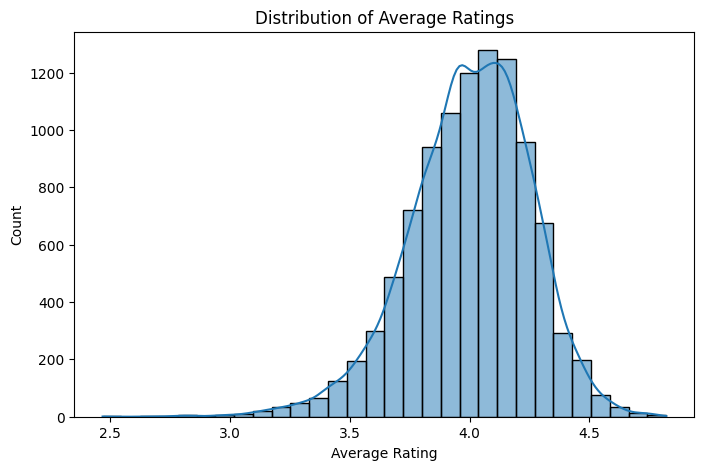

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(books['average_rating'], bins=30, kde=True)
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.show()


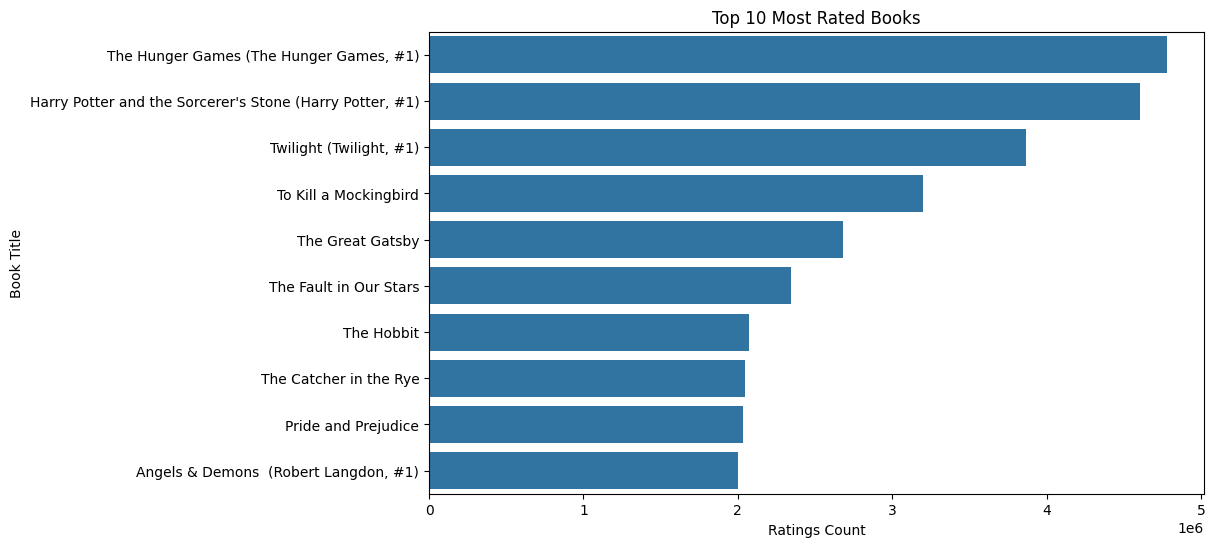

In [32]:
top_rated = books.sort_values("ratings_count", ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(y="title", x="ratings_count", data=top_rated)
plt.title("Top 10 Most Rated Books")
plt.xlabel("Ratings Count")
plt.ylabel("Book Title")
plt.show()


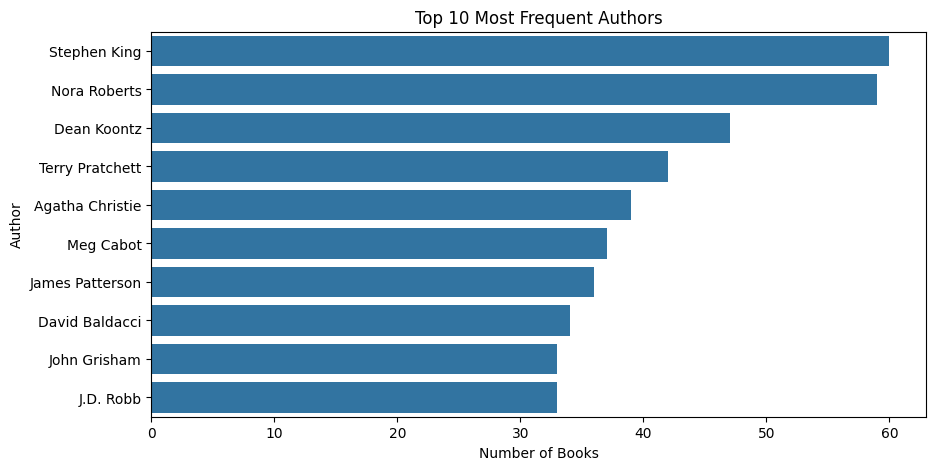

In [33]:
top_authors = books['authors'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title("Top 10 Most Frequent Authors")
plt.xlabel("Number of Books")
plt.ylabel("Author")
plt.show()


In [34]:
highly_rated_popular = books[(books['average_rating'] >= 4.5) & (books['ratings_count'] >= 100000)]
print(highly_rated_popular[['title', 'authors', 'average_rating', 'ratings_count']])


                                                  title  \
17    Harry Potter and the Prisoner of Azkaban (Harr...   
23    Harry Potter and the Goblet of Fire (Harry Pot...   
24    Harry Potter and the Deathly Hallows (Harry Po...   
26    Harry Potter and the Half-Blood Prince (Harry ...   
134      A Storm of Swords (A Song of Ice and Fire, #3)   
160   The Return of the King (The Lord of the Rings,...   
174   The Last Olympian (Percy Jackson and the Olymp...   
191   The Name of the Wind (The Kingkiller Chronicle...   
266                                     The Nightingale   
306   The Wise Man's Fear (The Kingkiller Chronicle,...   
421            Harry Potter Boxset (Harry Potter, #1-7)   
459       Clockwork Princess (The Infernal Devices, #3)   
561       The Way of Kings (The Stormlight Archive, #1)   
683      The House of Hades (The Heroes of Olympus, #4)   
716   The Hunger Games: Official Illustrated Movie C...   
768                        The Complete Sherlock Holmes 

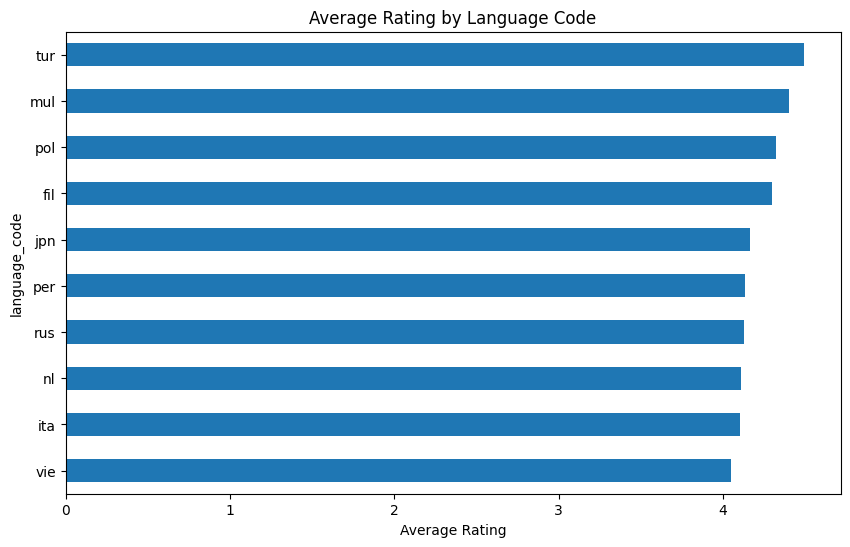

In [35]:
lang_rating = books.groupby('language_code')['average_rating'].mean().sort_values(ascending=False).head(10)
lang_rating.plot(kind='barh', title='Average Rating by Language Code', figsize=(10,6))
plt.xlabel("Average Rating")
plt.gca().invert_yaxis()
plt.show()
